In [1]:
import numpy as np
import sys, os
sys.path.append('..')
import matplotlib.pyplot as plt

In [2]:
### 신경망에서의 단어 처리
c = np.array([[1,0,0,0,0,0,0]])
W = np.random.randn(7,3)
h = np.matmul(c, W)
print(h)

[[-0.06608406  0.76416998  1.26830408]]


In [3]:
c.shape

(1, 7)

In [4]:
from common.layers import MatMul

In [5]:
c = np.array([[1,0,0,0,0,0,0]])
W = np.random.randn(7,3)

layer = MatMul(W)
h = layer.forward(c)
print(h)

[[ 0.54558945 -0.71175719 -1.47560687]]


In [6]:
### CBOW 모델의 추론처리 구현
c0 = np.array([[1,0,0,0,0,0,0]])
c1 = np.array([[0,0,1,0,0,0,0]])

W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
s

array([[ 1.66028088,  0.74064255,  1.13510023,  0.16682218, -1.19751794,
         0.76814913, -0.0756736 ]])

In [7]:
from common.util import preprocess

In [8]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [9]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size : -window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size+1):
            if t==0:
                continue
            cs.append(corpus[idx+t])
        contexts.append(cs)
        
    return np.array(contexts), np.array(target)

In [10]:
contexts, target = create_contexts_target(corpus, window_size=1)
contexts, target

(array([[0, 2],
        [1, 3],
        [2, 4],
        [3, 1],
        [4, 5],
        [1, 6]]),
 array([1, 2, 3, 4, 1, 5]))

In [11]:
from common.util import convert_one_hot

In [12]:
### 원핫 표현으로 변환
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus)

vocab_size = len(word_to_id)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

In [13]:
from common.layers import SoftmaxWithLoss

In [14]:
0.5 * (contexts[:, 0] + contexts[:, 1])

array([[0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0.5]])

In [15]:
### SimpleCBOW 클래스 구현
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params = []
        self.grads = []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = 0.5 * (h0 + h1)
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer0.backward(da)
        self.in_layer1.backward(da)
        return None

In [16]:
contexts[:, 0]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]], dtype=int32)

In [22]:
from common.trainer import Trainer
from common.optimizer import *
from common.util import preprocess

In [20]:
plt.rcParams['font.family'] = 'AppleGothic'

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 750 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 751 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 752 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 753 |  반복 1 / 2 | 시간 0[s] | 손실 0.40
| 에폭 754 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 755 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 756 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 757 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 758 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 759 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 760 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 761 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 762 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 763 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 764 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 765 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 766 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 767 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 768 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 769 |  반복 1 / 2 | 시간 0[s] | 손실 0.52
| 에폭 770 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 771 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 772 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 773 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 774 |  반복 1

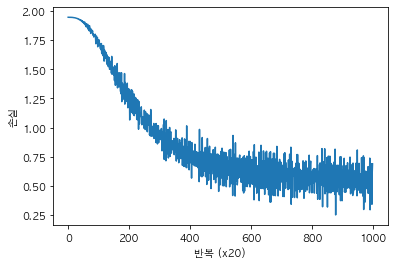

In [21]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 26 |

| 에폭 749 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 750 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 751 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 752 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 753 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 754 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 755 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 756 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 757 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 758 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 759 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 760 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 761 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 762 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 763 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 764 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 765 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 766 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 767 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 768 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 769 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 770 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 771 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 772 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 773 |  반복 1

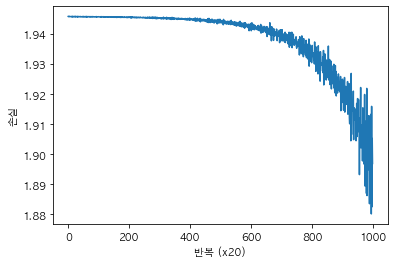

In [23]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = SGD()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.92
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.92
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.92
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.91
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 26 |

| 에폭 777 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 778 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 779 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 780 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 781 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 782 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 783 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 784 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 785 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 786 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 787 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 788 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 789 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 790 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 791 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 792 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 793 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 794 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 795 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 796 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 797 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 798 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 799 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 800 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 801 |  반복 1

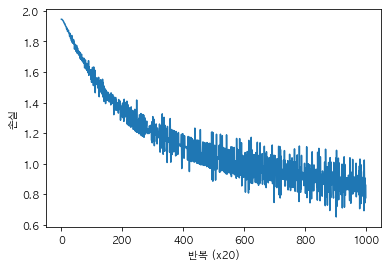

In [24]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = AdaGrad()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 26 |

| 에폭 760 |  반복 1 / 2 | 시간 0[s] | 손실 0.01
| 에폭 761 |  반복 1 / 2 | 시간 0[s] | 손실 0.36
| 에폭 762 |  반복 1 / 2 | 시간 0[s] | 손실 0.36
| 에폭 763 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 764 |  반복 1 / 2 | 시간 0[s] | 손실 0.12
| 에폭 765 |  반복 1 / 2 | 시간 0[s] | 손실 0.13
| 에폭 766 |  반복 1 / 2 | 시간 0[s] | 손실 0.36
| 에폭 767 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 768 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 769 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 770 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 771 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 772 |  반복 1 / 2 | 시간 0[s] | 손실 0.13
| 에폭 773 |  반복 1 / 2 | 시간 0[s] | 손실 0.35
| 에폭 774 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 775 |  반복 1 / 2 | 시간 0[s] | 손실 0.13
| 에폭 776 |  반복 1 / 2 | 시간 0[s] | 손실 0.35
| 에폭 777 |  반복 1 / 2 | 시간 0[s] | 손실 0.13
| 에폭 778 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 779 |  반복 1 / 2 | 시간 0[s] | 손실 0.12
| 에폭 780 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 781 |  반복 1 / 2 | 시간 0[s] | 손실 0.13
| 에폭 782 |  반복 1 / 2 | 시간 0[s] | 손실 0.35
| 에폭 783 |  반복 1 / 2 | 시간 0[s] | 손실 0.13
| 에폭 784 |  반복 1

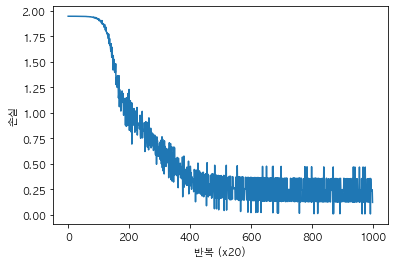

In [25]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Momentum()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()

In [19]:
target

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [20]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

In [26]:
### 가중치 매개변수(word_vecs) 확인
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.629278    0.891759    0.88550115 -1.0394347   2.163814  ]
say [-0.7608765 -1.1343437  1.2927775 -0.3394822 -1.6682305]
goodbye [ 0.65302676  0.76581454 -1.8402073   0.61548007  0.50481486]
and [-2.3256621  -1.1565884   1.0404819   1.1066835   0.13607502]
i [ 0.66601586  0.77945244 -1.8251774   0.6258483   0.5059294 ]
hello [ 1.620437   0.8789329  0.8766779 -1.0350385  2.1647239]
. [ 1.5836221   0.05355429  0.25777695 -1.4407914  -1.7685127 ]


In [27]:
word_id

6

In [28]:
### skip-gram 모델 구현
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V = vocab_size
        H = hidden_size
        
        W_in = 0.01 * np.random.randn(V,H).astype('f')
        W_out = 0.01 * np.random.randn(H,V).astype('f')
        
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()
        
        layers = [self.in_layer, self.out_layer]
        self.params = []
        self.grads = []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        ds1 = self.loss_layer1.backward(dout)
        ds2 = self.loss_layer2.backward(dout)
        ds = ds1 + ds2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 26 |

| 에폭 621 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 622 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 623 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 624 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 625 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 626 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 627 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 628 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 629 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 630 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 631 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 632 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 633 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 634 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 635 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 636 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 637 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 638 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 639 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 640 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 641 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 642 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 643 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 644 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 645 |  반복 1

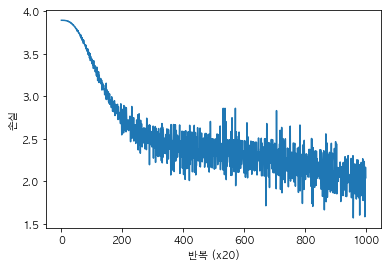

In [30]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 26 |

| 에폭 633 |  반복 1 / 2 | 시간 0[s] | 손실 3.57
| 에폭 634 |  반복 1 / 2 | 시간 0[s] | 손실 3.55
| 에폭 635 |  반복 1 / 2 | 시간 0[s] | 손실 3.52
| 에폭 636 |  반복 1 / 2 | 시간 0[s] | 손실 3.56
| 에폭 637 |  반복 1 / 2 | 시간 0[s] | 손실 3.52
| 에폭 638 |  반복 1 / 2 | 시간 0[s] | 손실 3.54
| 에폭 639 |  반복 1 / 2 | 시간 0[s] | 손실 3.54
| 에폭 640 |  반복 1 / 2 | 시간 0[s] | 손실 3.53
| 에폭 641 |  반복 1 / 2 | 시간 0[s] | 손실 3.52
| 에폭 642 |  반복 1 / 2 | 시간 0[s] | 손실 3.51
| 에폭 643 |  반복 1 / 2 | 시간 0[s] | 손실 3.47
| 에폭 644 |  반복 1 / 2 | 시간 0[s] | 손실 3.55
| 에폭 645 |  반복 1 / 2 | 시간 0[s] | 손실 3.51
| 에폭 646 |  반복 1 / 2 | 시간 0[s] | 손실 3.52
| 에폭 647 |  반복 1 / 2 | 시간 0[s] | 손실 3.47
| 에폭 648 |  반복 1 / 2 | 시간 0[s] | 손실 3.51
| 에폭 649 |  반복 1 / 2 | 시간 0[s] | 손실 3.47
| 에폭 650 |  반복 1 / 2 | 시간 0[s] | 손실 3.45
| 에폭 651 |  반복 1 / 2 | 시간 0[s] | 손실 3.48
| 에폭 652 |  반복 1 / 2 | 시간 0[s] | 손실 3.49
| 에폭 653 |  반복 1 / 2 | 시간 0[s] | 손실 3.44
| 에폭 654 |  반복 1 / 2 | 시간 0[s] | 손실 3.47
| 에폭 655 |  반복 1 / 2 | 시간 0[s] | 손실 3.48
| 에폭 656 |  반복 1 / 2 | 시간 0[s] | 손실 3.46
| 에폭 657 |  반복 1

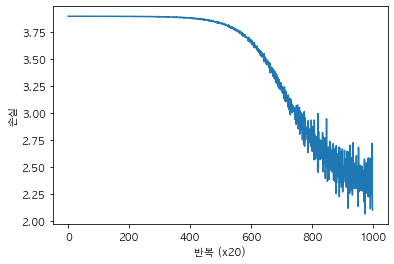

In [31]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = SGD()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 26 |

| 에폭 640 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 641 |  반복 1 / 2 | 시간 0[s] | 손실 1.62
| 에폭 642 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 643 |  반복 1 / 2 | 시간 0[s] | 손실 1.62
| 에폭 644 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 645 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 646 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 647 |  반복 1 / 2 | 시간 0[s] | 손실 1.62
| 에폭 648 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 649 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 650 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 651 |  반복 1 / 2 | 시간 0[s] | 손실 1.62
| 에폭 652 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 653 |  반복 1 / 2 | 시간 0[s] | 손실 1.63
| 에폭 654 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 655 |  반복 1 / 2 | 시간 0[s] | 손실 1.62
| 에폭 656 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 657 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 658 |  반복 1 / 2 | 시간 0[s] | 손실 1.63
| 에폭 659 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 660 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 661 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 662 |  반복 1 / 2 | 시간 0[s] | 손실 1.85
| 에폭 663 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 664 |  반복 1

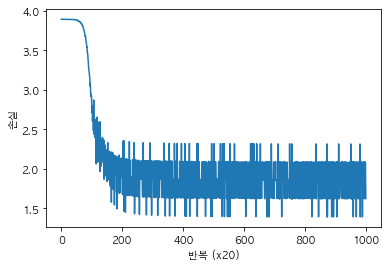

In [32]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Momentum()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.86
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.86
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.85
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.84
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.84
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.82
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.82
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.80
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.81
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.78
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.79
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.77
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.77
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.76
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.74
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.75
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.73
| 에폭 26 |

| 에폭 619 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 620 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 621 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 622 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 623 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 624 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 625 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 626 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 627 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 628 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 629 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 630 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 631 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 632 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 633 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 634 |  반복 1 / 2 | 시간 0[s] | 손실 2.57
| 에폭 635 |  반복 1 / 2 | 시간 0[s] | 손실 2.53
| 에폭 636 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 637 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 638 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 639 |  반복 1 / 2 | 시간 0[s] | 손실 2.69
| 에폭 640 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 641 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 642 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 643 |  반복 1

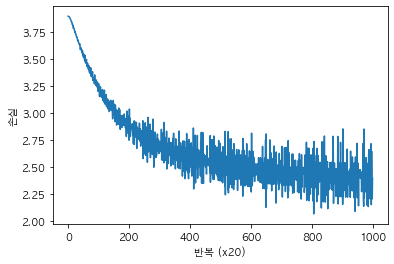

In [33]:
### 학습 코드 구현
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts, vocab_size)
target = convert_one_hot(target, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = AdaGrad()
trainer = Trainer(model, optimizer)

trainer.fit(x=contexts, t=target, max_epoch=max_epoch, batch_size=batch_size)
trainer.plot()